In [2]:
import numpy as np
from sklearn import preprocessing
from matplotlib import pyplot as plt
import os
from keras.layers import Input, Dense, Lambda
from keras.models import Model

Using TensorFlow backend.


In [17]:
datapath = "Sample Data"
#datapath = "E:\\Development Project\\Data\\GNPS Binned" #Absolute path for data.
#datapath = "E:\\Development Project\\Code\\Masters-Autoencoder\\Sample Data"
num_samples = 100 
numFeatures = 2995
default_dpi = plt.rcParamsDefault['figure.dpi']
plt.rcParams['figure.dpi'] = default_dpi*1.1

In [4]:
def rolling_window_filter(a):
    b = np.zeros([numFeatures, 1], float)
    #print("Start:")
    for i in range(len(a)):
        lowend = 0
        if i<50:
            lowend = i  # If there are fewer than 50 bins behind current windows, only go back to index 0.
        if i>=50:
            lowend = 50  # Else, go back 50 indices.
        #print(len(a[i-lowend:i+50]))
        comp = np.less(a[i], a[i-lowend:(i+50)])  # Compare current value to values for all bins in 100Da range
        # print(comp)
        if np.sum(comp)<7:  # If value is among top 6 in 100Da range, add it to final array b.
            b[i] = a[i]
        #if np.sum(comp)>93:
            # print(str(i) + ": " + str(np.sum(comp)))

    # Comparison prints of unfiltered and filtered arrays.
    # print(a.size)
    # print(a.shape)
    # print(np.amax(a))
    #print(np.count_nonzero(a))
    # print(b.size)
    # print(b.shape)
    # print(np.amax(b))
    #print(np.count_nonzero(b))
    return b

In [5]:
def load_data():
    data = np.zeros([numFeatures, 0], float)
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            print(file)
            min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols = 2) #U ses only the 3rd column, where intensities are stored.
            temp = temp.reshape(-1, 1)
            print(np.amax(temp))
            #temp = rolling_window_filter(temp)
            temp = min_max_scaler.fit_transform(temp)
            if np.amax(temp)<1.0: 
                print(np.amax(temp))
                plt.plot(temp, color='g')
                plt.show()
            if np.amin(temp>0):
                print(np.amin(temp))
            
            # temp = rolling_window_filter(temp)
            data = np.concatenate([data, temp], axis=1)

    print("Done")
    return data

In [7]:
def load_bin_values():
    for file in os.listdir(datapath):
        if file.endswith(".txt"):
            filepath = os.path.join(datapath, file)
            temp = np.loadtxt(filepath, np.float64, usecols=0)  # Grabs only the lower bound value for each bin
            temp = temp.reshape(-1, 1)
            temp = temp + 0.5  # Round values up to nearest integer.
            return temp  # End loop on first run, only need one batch of values.


CCMSLIB00000001548 binned.txt
109387080.0
CCMSLIB00000001549 binned.txt
32604272.0
CCMSLIB00000001550 binned.txt
43057184.0
CCMSLIB00000001555 binned.txt
367041.09
CCMSLIB00000001563 binned.txt
64301.03
0.9999999999999999


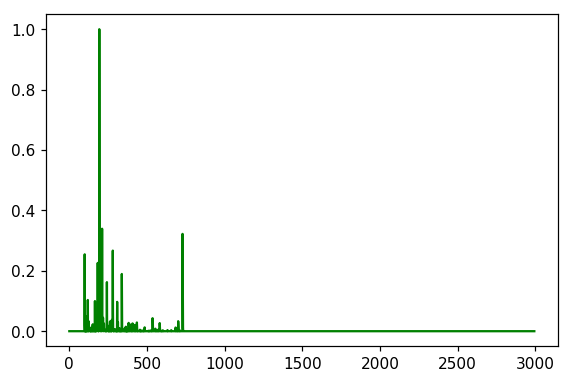

CCMSLIB00000001565 binned.txt
9896.4
CCMSLIB00000001566 binned.txt
20734.69
CCMSLIB00000001568 binned.txt
333.72
0.9999999999999999


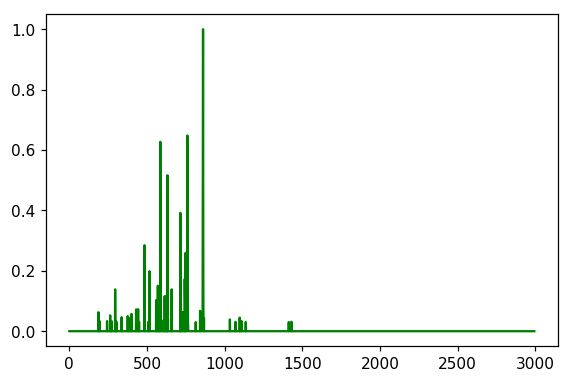

CCMSLIB00000001569 binned.txt
103564.98
CCMSLIB00000001570 binned.txt
811.76
CCMSLIB00000001572 binned.txt
1546.8
CCMSLIB00000001574 binned.txt
5483.52
CCMSLIB00000001576 binned.txt
10734.39
CCMSLIB00000001581 binned.txt
19181776.0
CCMSLIB00000001590 binned.txt
172760.3
CCMSLIB00000001598 binned.txt
8115.84
CCMSLIB00000001600 binned.txt
26551.12
CCMSLIB00000001601 binned.txt
5995577.0
0.9999999999999999


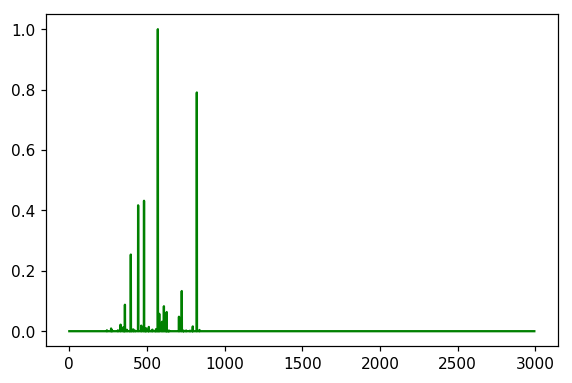

CCMSLIB00000001602 binned.txt
7592.63
0.9999999999999999


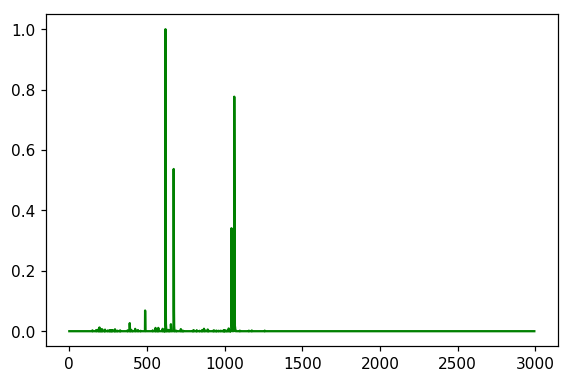

CCMSLIB00000001603 binned.txt
111843406.0
CCMSLIB00000001604 binned.txt
35997.72
CCMSLIB00000001606 binned.txt
154432.59
CCMSLIB00000001607 binned.txt
317436.59
CCMSLIB00000001608 binned.txt
64228456.0
CCMSLIB00000001609 binned.txt
1634.13
CCMSLIB00000001615 binned.txt
486.43
CCMSLIB00000001616 binned.txt
3114.98
CCMSLIB00000001617 binned.txt
120044.4
0.9999999999999999


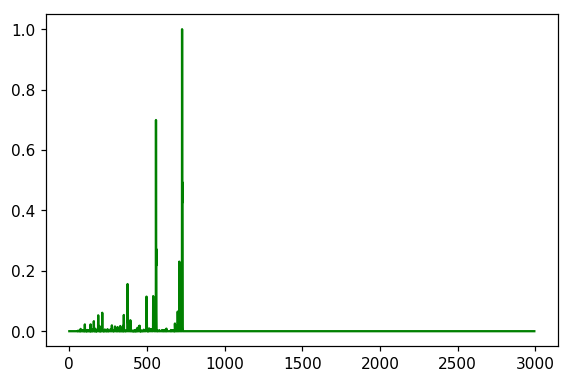

CCMSLIB00000001621 binned.txt
186817.91
CCMSLIB00000001622 binned.txt
171162.91
CCMSLIB00000001623 binned.txt
696121.19
CCMSLIB00000001624 binned.txt
6232.86
CCMSLIB00000001625 binned.txt
640243.38
CCMSLIB00000001631 binned.txt
164380.8
CCMSLIB00000001633 binned.txt
135754.41
CCMSLIB00000001634 binned.txt
5480920.0
CCMSLIB00000001635 binned.txt
20470.89
CCMSLIB00000001637 binned.txt
12700.95
CCMSLIB00000001638 binned.txt
8752910.0
CCMSLIB00000001641 binned.txt
12845.37
CCMSLIB00000001642 binned.txt
5234278.0
0.9999999999999999


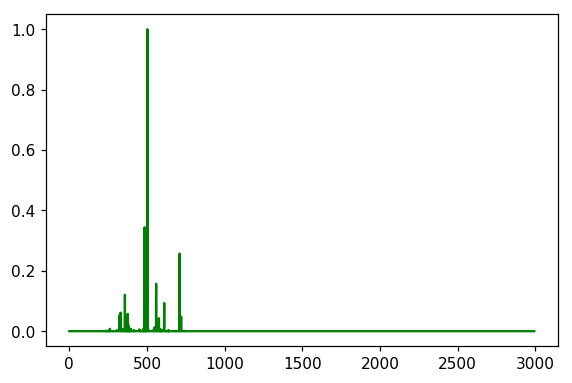

CCMSLIB00000001643 binned.txt
8174.73
CCMSLIB00000001645 binned.txt
23540.32
CCMSLIB00000001646 binned.txt
9859244.0
CCMSLIB00000001650 binned.txt
74985897.0
CCMSLIB00000001651 binned.txt
637.88
0.9999999999999999


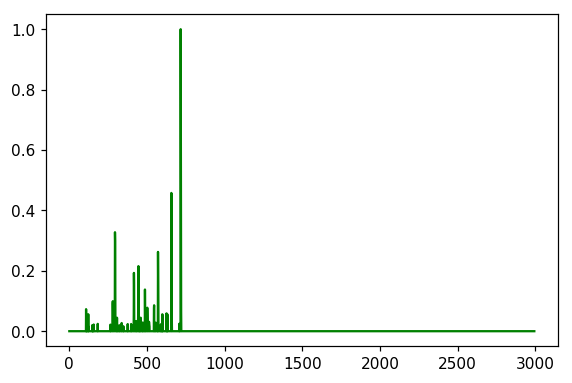

CCMSLIB00000001653 binned.txt
1217.61
CCMSLIB00000001655 binned.txt
2021.29
0.9999999999999999


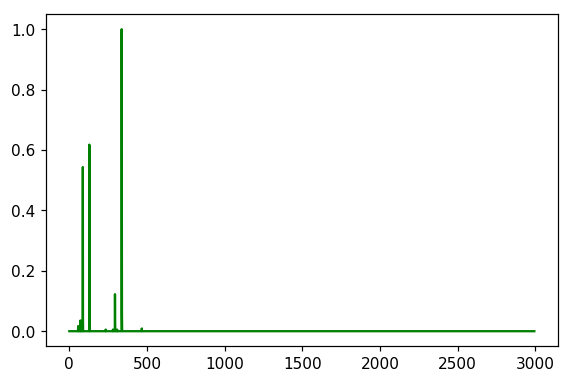

CCMSLIB00000001673 binned.txt
4490.56
CCMSLIB00000001676 binned.txt
23910.69
CCMSLIB00000001678 binned.txt
8176.94
CCMSLIB00000001680 binned.txt
1827.32
CCMSLIB00000001682 binned.txt
2428.78
CCMSLIB00000001702 binned.txt
11213482.0
CCMSLIB00000001707 binned.txt
2292710.0
CCMSLIB00000001711 binned.txt
67812013.0
CCMSLIB00000001712 binned.txt
295991488.0
CCMSLIB00000001715 binned.txt
25125448.0
0.9999999999999999


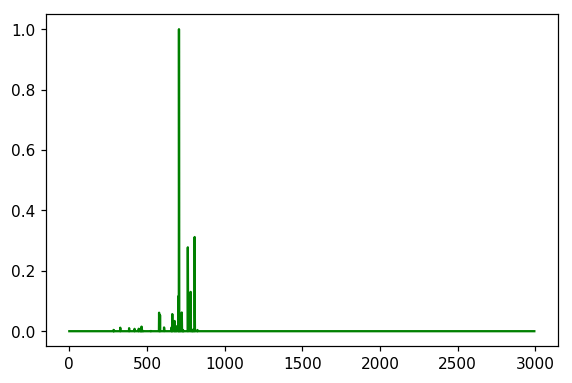

CCMSLIB00000001729 binned.txt
15342980.0
CCMSLIB00000001730 binned.txt
18534656.0
CCMSLIB00000001754 binned.txt
14596656.0
CCMSLIB00000001756 binned.txt
82638584.0
CCMSLIB00000001757 binned.txt
13099768.0
CCMSLIB00000001759 binned.txt
8247035.0
CCMSLIB00000001760 binned.txt
4282866.0
CCMSLIB00000001761 binned.txt
4948748.0
CCMSLIB00000001776 binned.txt
87530592.0
CCMSLIB00000001777 binned.txt
266457920.0
CCMSLIB00000001778 binned.txt
14096592.0
CCMSLIB00000001784 binned.txt
32900992.0
CCMSLIB00000001785 binned.txt
10124.0
CCMSLIB00000001786 binned.txt
35241328.0
CCMSLIB00000001790 binned.txt
507026.0
CCMSLIB00000001791 binned.txt
9111149.0
CCMSLIB00000001798 binned.txt
228700096.0
CCMSLIB00000001799 binned.txt
812085.0
CCMSLIB00000001800 binned.txt
3708640.0
CCMSLIB00000001803 binned.txt
12595312.0
CCMSLIB00000001810 binned.txt
191350.0
CCMSLIB00000001811 binned.txt
1825712.0
CCMSLIB00000001812 binned.txt
4024405.0
CCMSLIB00000001813 binned.txt
2228327.0
CCMSLIB00000001814 binned.txt
4

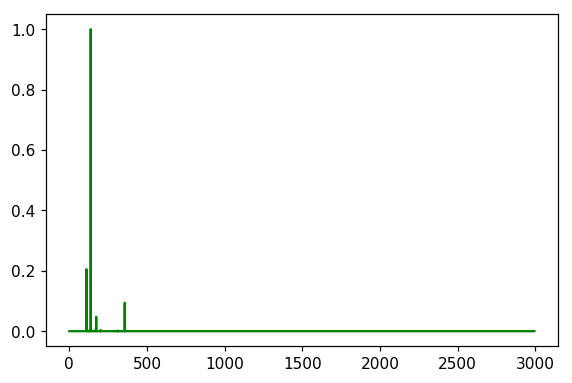

CCMSLIB00000004250 binned.txt
26467.14
CCMSLIB00000004253 binned.txt
117740.28
CCMSLIB00000004256 binned.txt
18245.2
CCMSLIB00000004259 binned.txt
497447.86
CCMSLIB00000004265 binned.txt
1799763.86
CCMSLIB00000004274 binned.txt
280981.47
CCMSLIB00000004277 binned.txt
45939.07
CCMSLIB00000004280 binned.txt
3890.39
CCMSLIB00000004283 binned.txt
274932.91
CCMSLIB00000004304 binned.txt
59481.81
CCMSLIB00000004307 binned.txt
25851.16
CCMSLIB00000004310 binned.txt
1328.07
CCMSLIB00000004313 binned.txt
74550.79
0.9999999999999999


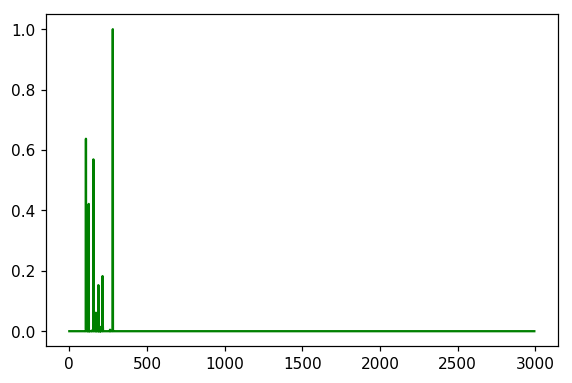

CCMSLIB00000004319 binned.txt
2005.15
0.9999999999999999


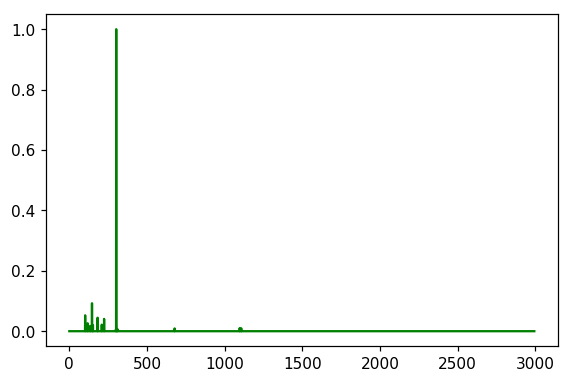

CCMSLIB00000004322 binned.txt
521.2
Done
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2995, 100)
float64


In [8]:
main = load_data()
labels = load_bin_values()

print(main)
print(main.shape)
print(main.dtype)


In [9]:
print(main)
print(main.shape)
print(main.dtype)
print(np.amax(main))
print(np.amin(main))
print(main.shape[0])
print(main[1,].shape)
#Verify maxima
for row in range(main.shape[0]):
    if np.amax(main[row],)>1:
        print(str(row) + " exceeds maximum allowed value")
        print(np.amax(main[row,]))            

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(2995, 100)
float64
1.0
0.0
2995
(100,)
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
22

1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2087
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2101
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113


[0 0 0 ... 0 0 0]
(2995,)
35


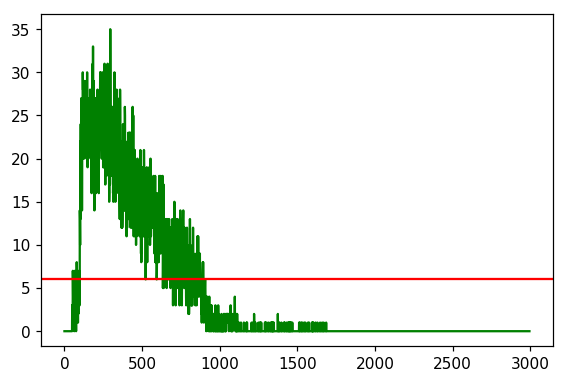

Number of bins with only 0s: 1923
Number of bins with 1 non-zero: 164
Total number of bins with fewer than 6 non-zero values:2250


array([   0,    1,    2, ..., 2992, 2993, 2994], dtype=int64)

In [10]:
nonzeros = (np.count_nonzero(main, axis =1)) #Get count of non-zeros values for all bins.

print(nonzeros)
print(nonzeros.shape)
print(np.amax(nonzeros)) #Highest number of non-zeros out of all bins.

plt.plot(nonzeros, color = 'g')
plt.axhline(y = 6, color = 'r')
plt.show()

print("Number of bins with only 0s: " + str(len(np.where(nonzeros==0)[0])))

print("Number of bins with 1 non-zero: " + str(len(np.where(nonzeros==1)[0])))

print("Total number of bins with fewer than 6 non-zero values:" + str(len(np.where(nonzeros<6)[0])))

np.where(nonzeros<6)[0] #Indices of bins with <6 non-zero values.

In [11]:
testmain = main #Keep copy of untrimmed matrix, just in case.
testmain = np.delete(testmain, np.where(nonzeros<6)[0], axis = 0) #Remove features that have <6 non-zeros values.
print(testmain.shape)

nzero = (np.count_nonzero(testmain, axis =1))
print(len(np.where(nzero<6)[0])) #Verify that all <6 non-zero features were removed. Should output 0.

(745, 100)
0


In [12]:
maxVals = np.amax(testmain, axis=1) #Get max values for each feature.
print(maxVals[:10])
print(maxVals.shape)
print(len(np.where(maxVals<0.05)[0])) #Output number of bins with max value <0.05.
testmain = np.delete(testmain, np.where(maxVals<0.05)[0], axis=0) #Remove features that have max value <0.05
print(testmain.shape)
numFeatures = testmain.shape[0] #Update feature number variable

maxValsVerify = (np.amax(testmain, axis = 1))
print(len(np.where(maxValsVerify<0.05)[0])) #Verify said features have been removed.

[0.43484072 0.02695135 0.04261613 0.29273038 0.03257983 0.25858189
 0.03723521 0.14883651 0.56879093 0.05509067]
(745,)
145
(600, 100)
0


In [13]:
print(testmain.shape)

(600, 100)


In [14]:
def basic_autoencoder(x_train, x_val, epochs=100, encoded_dim=10):
    # inputLayer = Input(shape=x_train.shape) #This line brings up this error: expected input_4 to have 3 dimensions, but got array with shape (600, 100)
    inputLayer = Input(shape=(x_train.shape[1],))  # fixed
    output_dims = x_train.shape[1]

    l = inputLayer
    l = Dense(256, activation='relu')(l)
    l = Dense(128, activation='relu')(l)
    l = Dense(16, activation='relu')(l)
    l = Dense(encoded_dim)(l)

    latent_space = l

    l2 = Dense(16, activation='relu')(l)
    l2 = Dense(128, activation='relu')(l2)
    l2 = Dense(256, activation='relu')(l2)
    l2 = Dense(output_dims, activation='sigmoid')(l2)

    out_layer = l2

    auto_model = Model(input=inputLayer, outputs=out_layer)

    auto_model.compile(loss='mean_squared_error', optimizer='sgd')

    # Fixed this line: added x_train again: you need to give it the targets! Also removed the batch stuff
    autoencoder_train = auto_model.fit(x_train, x_train, shuffle=False, epochs=epochs, validation_data=(x_val, x_val))
     
    return autoencoder_train
    

In [15]:
def plot_loss(fitted_model, train_data, val_data, epochs):
    loss = fitted_model.history['loss']
    val_loss = fitted_model.history['val_loss']
    epochs = range(epochs)

    plt.figure()
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, loss,'r', label='Validation loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.show()
    
    #plt.figure()
    #embedding = fitted_model.predict(train_data)
    #plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    #plt.show()
    
    #plt.figure()
    #embedding = fitted_model.predict(val_data)
    #plt.scatter(embedding[:,0], embedding[:,1], marker='o', s=1, edgecolor='', cmap="viridis")
    #plt.show()

(90, 600)
(600,)
600
(10, 600)
(600,)
600


c:\users\matej\envs\masters\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("de..., inputs=Tensor("in...)`


Train on 90 samples, validate on 10 samples
Epoch 1/10
90/90 [==============================] - 0s 2ms/step - loss: 0.2461 - val_loss: 0.2487
Epoch 2/10
90/90 [==============================] - 0s 200us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 3/10
90/90 [==============================] - 0s 244us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 4/10
90/90 [==============================] - 0s 222us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 5/10
90/90 [==============================] - 0s 233us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 6/10
90/90 [==============================] - 0s 211us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 7/10
90/90 [==============================] - 0s 189us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 8/10
90/90 [==============================] - 0s 211us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 9/10
90/90 [==============================] - 0s 200us/step - loss: 0.2461 - val_loss: 0.2487
Epoch 10/10
90/90 [==============================] - 0s 22

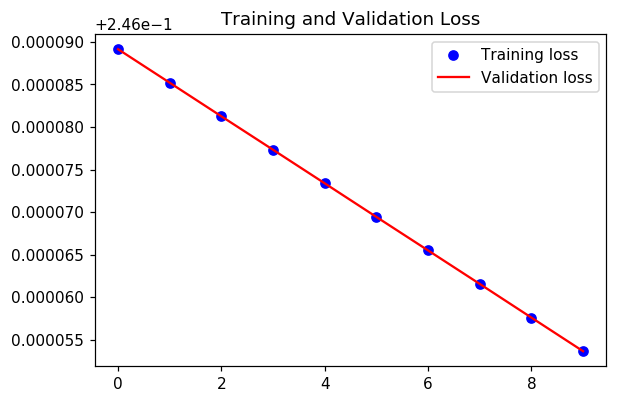

In [19]:
x_train = testmain
# x_train = x_train.reshape((1, -1))
x_train = x_train.transpose()  # transpose so that axis 0 is samples.
x_val = x_train[num_samples-10:]
x_train = x_train[:num_samples-10]
    
print(x_train.shape)
print(x_train[0].shape)
print(x_train.shape[1])
print(x_val.shape)
print(x_val[0].shape)
print(x_val.shape[1])

epochs1 = 10
epochs2 = 200
epochs3 = 500

enc1 = basic_autoencoder(x_train, x_val, epochs=epochs1, encoded_dim=10)
plot_loss(enc1, x_train, x_val, epochs1)

#enc2 = basic_autoencoder(x_train, x_val, epochs=epochs2, encoded_dim=10)
#plot_loss(enc2, x_train, x_val, epochs2)

#enc3 = basic_autoencoder(x_train, x_val, epochs=epochs3, encoded_dim=10)
#plot_loss(enc3, x_train, x_val, epochs3)


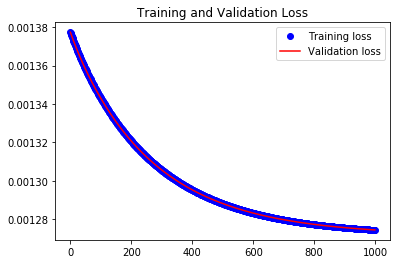

In [36]:
plot_loss(enc3, x_train, x_val, epochs3)